<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_MOD3_AML/blob/main/CORE7_Costumers_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("binovi/wholesale-customers-data-set")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Archivos en la carpeta:", files)
path = os.path.join(path, files[0])
print("Path to dataset file:", path)

100%|██████████| 6.85k/6.85k [00:00<00:00, 417kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/binovi/wholesale-customers-data-set/versions/1
Archivos en la carpeta: ['Wholesale customers data.csv']
Path to dataset file: /root/.cache/kagglehub/datasets/binovi/wholesale-customers-data-set/versions/1/Wholesale customers data.csv


In [5]:
# Cargar datos
df = pd.read_csv(path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Primeras filas del dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64


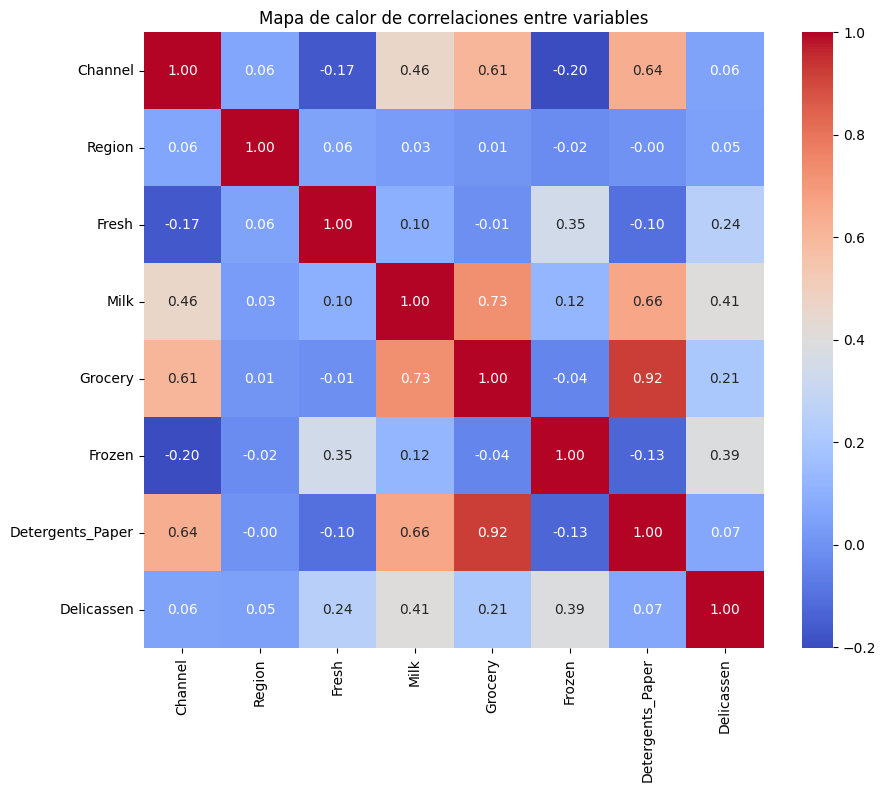

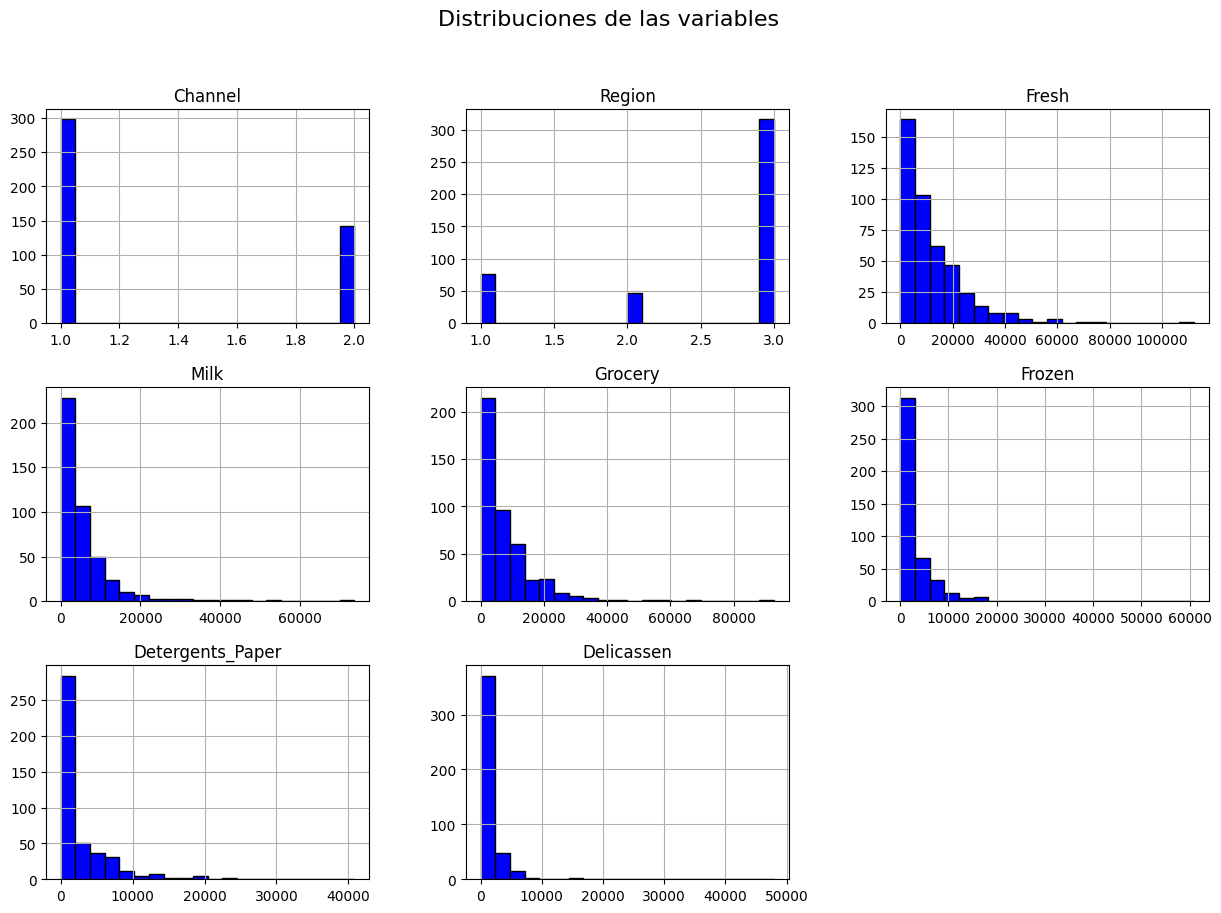

In [8]:
# Exploración inicial del dataset
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general del dataset:")
print(df.info())

print("\nDescripción estadística del dataset:")
print(df.describe())

# Identificación de variables importantes para agrupamiento
# Visualizar correlaciones para observar relaciones entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()

# Visualización de las distribuciones de las variables
df.hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Distribuciones de las variables", fontsize=16)
plt.show()


Descripción estadística del dataset:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%    

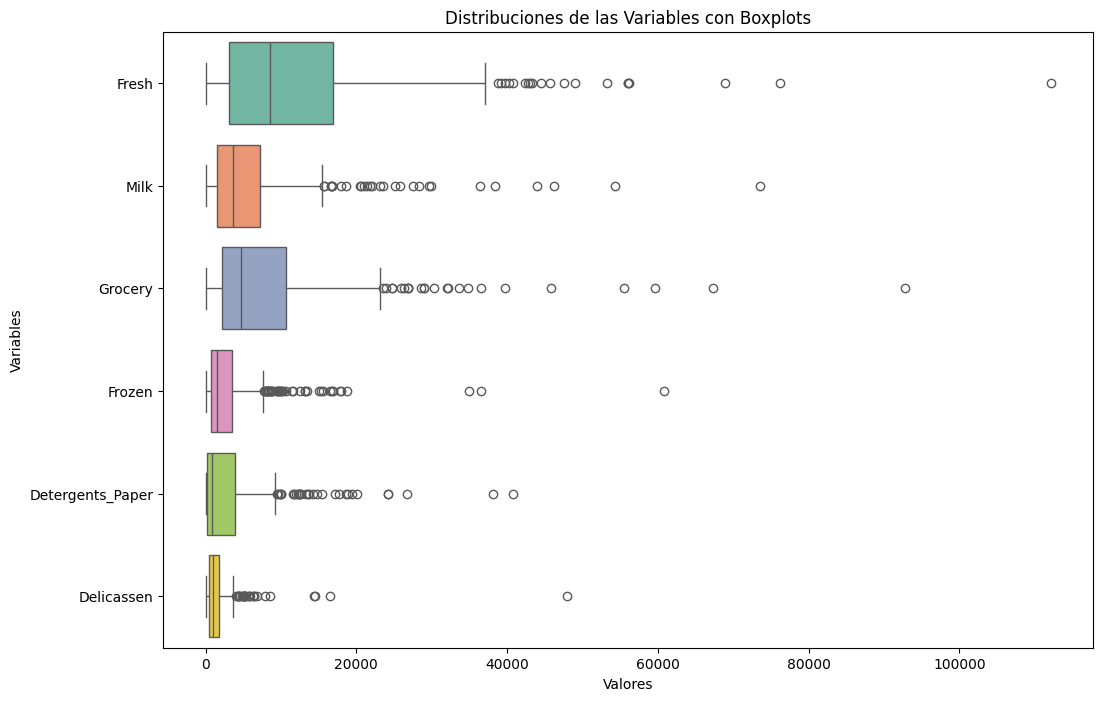


Detección de valores atípicos utilizando el rango intercuartílico (IQR):
Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

Primeras filas después de la estandarización:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.128573  1.051586  0.049267 -0.953244          0.095792    0.065892
1 -0.421627  1.086735  0.353865 -0.309735          0.306519    0.470759
2 -0.490647  0.858040  0.067935 -0.042437          0.382435    2.469440
3  0.187004 -0.879308 -0.457635  1.619962         -0.641923    0.481851
4  1.103677  0.082487 -0.005824  0.585275         -0.209575    2.469440


In [9]:
# Resumen estadístico de las variables
print("\nDescripción estadística del dataset:")
print(df.describe())

# Análisis de la distribución de las variables
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de distribuciones
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 2:], orient="h", palette="Set2")  # Excluir columnas categóricas
plt.title("Distribuciones de las Variables con Boxplots")
plt.xlabel("Valores")
plt.ylabel("Variables")
plt.show()

# Identificación de outliers
print("\nDetección de valores atípicos utilizando el rango intercuartílico (IQR):")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

# Tratamiento de valores atípicos (opcional: puedes eliminarlos o manejarlos)
# Ejemplo: Reemplazo de outliers extremos con los límites del IQR
df_cleaned = df.copy()
df_cleaned = df_cleaned.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

# Estandarización de las variables (esencial para DBSCAN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned.iloc[:, 2:]), columns=df_cleaned.columns[2:])  # Excluir columnas categóricas

# Verificar las primeras filas después de la estandarización
print("\nPrimeras filas después de la estandarización:")
print(df_scaled.head())


In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir el modelo DBSCAN
eps_values = [0.5, 1.0, 1.5]  # Valores de ejemplo para epsilon
min_samples_values = [5, 10, 20]  # Valores de ejemplo para min_samples

# Experimentar con diferentes valores de epsilon y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)

        # Evaluar cohesión de clusters con Silhouette Score (si hay más de 1 cluster)
        if len(set(clusters)) > 1:
            silhouette = silhouette_score(df_scaled, clusters)
        else:
            silhouette = "No válido (1 cluster o menos)"

        print(f"DBSCAN - Epsilon: {eps}, Min_samples: {min_samples}")
        print(f"  Número de clusters (incluyendo outliers): {len(set(clusters))}")
        print(f"  Silhouette Score: {silhouette}\n")


DBSCAN - Epsilon: 0.5, Min_samples: 5
  Número de clusters (incluyendo outliers): 4
  Silhouette Score: -0.12915976262585138

DBSCAN - Epsilon: 0.5, Min_samples: 10
  Número de clusters (incluyendo outliers): 2
  Silhouette Score: -0.03378127777834076

DBSCAN - Epsilon: 0.5, Min_samples: 20
  Número de clusters (incluyendo outliers): 2
  Silhouette Score: -0.1518152829427377

DBSCAN - Epsilon: 1.0, Min_samples: 5
  Número de clusters (incluyendo outliers): 6
  Silhouette Score: 0.05746172310426485

DBSCAN - Epsilon: 1.0, Min_samples: 10
  Número de clusters (incluyendo outliers): 2
  Silhouette Score: 0.27766209217412435

DBSCAN - Epsilon: 1.0, Min_samples: 20
  Número de clusters (incluyendo outliers): 2
  Silhouette Score: 0.24159761705031016

DBSCAN - Epsilon: 1.5, Min_samples: 5
  Número de clusters (incluyendo outliers): 2
  Silhouette Score: 0.329098326102201

DBSCAN - Epsilon: 1.5, Min_samples: 10
  Número de clusters (incluyendo outliers): 2
  Silhouette Score: 0.33645628426147

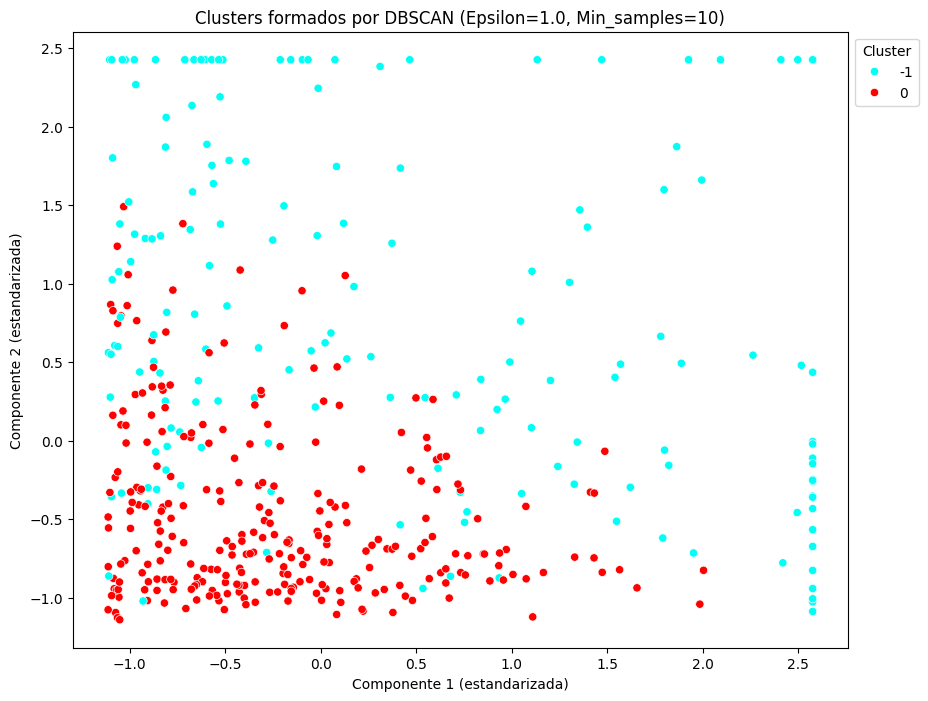

In [11]:
# Seleccionar un conjunto de parámetros para DBSCAN
eps_opt = 1.0  # Ajustar según los experimentos
min_samples_opt = 10  # Ajustar según los experimentos

dbscan_opt = DBSCAN(eps=eps_opt, min_samples=min_samples_opt)
clusters_opt = dbscan_opt.fit_predict(df_scaled)

# Agregar los clusters al dataset original
df['Cluster_DBSCAN'] = clusters_opt

# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 8))
palette = sns.color_palette("hsv", len(set(clusters_opt)) - (1 if -1 in clusters_opt else 0))
sns.scatterplot(
    x=df_scaled.iloc[:, 0],  # Primer componente
    y=df_scaled.iloc[:, 1],  # Segundo componente
    hue=clusters_opt,
    palette=palette + ["red"] if -1 in clusters_opt else palette,  # Los outliers en rojo
    legend="full"
)
plt.title(f"Clusters formados por DBSCAN (Epsilon={eps_opt}, Min_samples={min_samples_opt})")
plt.xlabel("Componente 1 (estandarizada)")
plt.ylabel("Componente 2 (estandarizada)")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1, 1))
plt.show()


Número de outliers identificados: 168


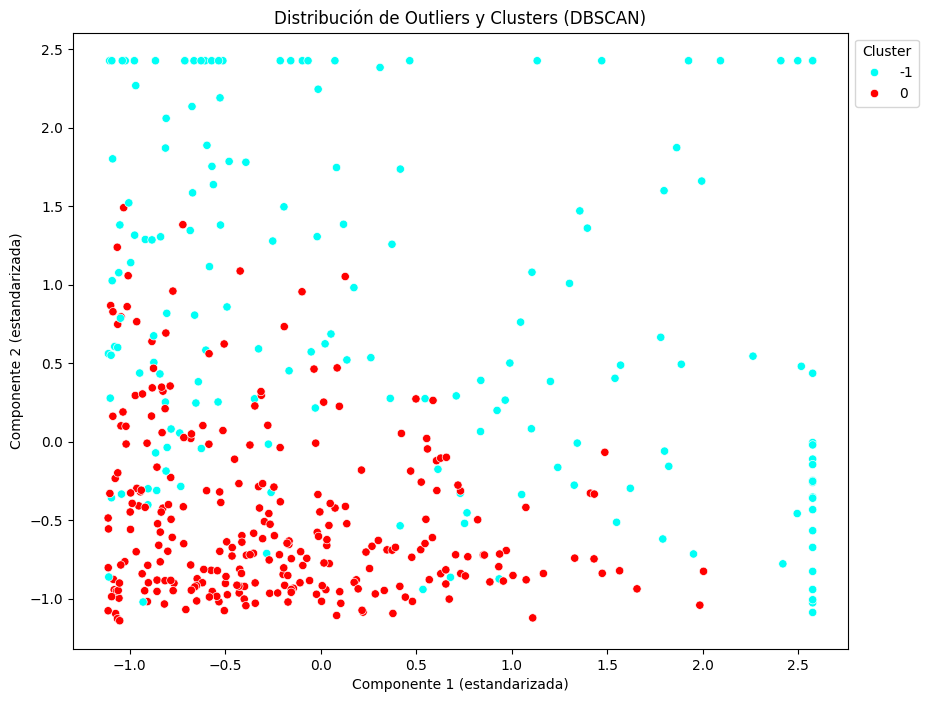

In [12]:
# Identificar outliers (etiquetados como -1 por DBSCAN)
outliers = df[df['Cluster_DBSCAN'] == -1]
print(f"Número de outliers identificados: {len(outliers)}")

# Visualizar los outliers en comparación con los datos agrupados
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_scaled.iloc[:, 0],
    y=df_scaled.iloc[:, 1],
    hue=df['Cluster_DBSCAN'],
    palette=palette + ["red"] if -1 in clusters_opt else palette,
    legend="full"
)
plt.title(f"Distribución de Outliers y Clusters (DBSCAN)")
plt.xlabel("Componente 1 (estandarizada)")
plt.ylabel("Componente 2 (estandarizada)")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1, 1))
plt.show()
